In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [2]:
test = pd.read_csv('movies_test.csv', encoding = 'utf-8')
train = pd.read_csv('movies_train.csv', encoding = 'utf-8')
sub = pd.read_csv('movie_submission.csv', encoding = 'utf-8')

In [3]:
test.shape , train.shape , sub.shape

((243, 11), (600, 12), (243, 2))

- 1 title : 영화의 제목
- 2 distributor : 배급사
- 3 genre : 장르
- 4 release_time : 개봉일
- 5 time : 상영시간(분)
- 6 screening_rat : 상영등급
- 7 director : 감독이름
- 8 dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
- 9 dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
- 10 num_staff : 스텝수
- 11 num_actor : 주연배우수
- 12 box_off_num : 관객수




- target variable : box_off_num
- datetime : release_time
- numeric : time, dir_prev_bfnum, dir_prev_num, num_staff, num_actor
- category : title, distributor, genre, screening_rat, director

- drop data = director, distributor , release_time

In [9]:
feature_cols = train.columns.difference(['box_off_num'])
df_x_train = train[feature_cols]
df_x_test = test[feature_cols]
df_y_train = train['box_off_num']
num_cols = ['time','dir_prev_bfnum','dir_prev_num','num_staff','num_actor']
cat_cols = ['screening_rat','genre']

In [12]:
from sklearn.preprocessing import OneHotEncoder

In [43]:
x_train = df_x_train.copy()
x_train.drop(['release_time', 'director','distributor','title'], axis = 1, inplace = True)
x_train.fillna(0,inplace = True)
x_train = pd.concat([x_train,pd.get_dummies(x_train['genre'])],axis = 1).drop(['genre'],axis = 1)
x_train = pd.concat([x_train,pd.get_dummies(x_train['screening_rat'])],axis = 1).drop(['screening_rat'],axis = 1)

In [44]:
x_train.head()

,dir_prev_bfnum,dir_prev_num,num_actor,num_staff,time,SF,공포,느와르,다큐멘터리,드라마,...,뮤지컬,미스터리,서스펜스,애니메이션,액션,코미디,12세 관람가,15세 관람가,전체 관람가,청소년 관람불가
0,0.00,0,2,91,96,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1161602.50,2,3,387,130,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,220775.25,4,4,343,123,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,23894.00,2,6,20,101,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,1.00,1,2,251,108,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [45]:
x_test = df_x_test.copy()
x_test.drop(['release_time', 'director','distributor','title'], axis = 1, inplace = True)
x_test.fillna(0,inplace = True)
x_test = pd.concat([x_test,pd.get_dummies(x_test['genre'])],axis = 1).drop(['genre'],axis = 1)
x_test = pd.concat([x_test,pd.get_dummies(x_test['screening_rat'])],axis = 1).drop(['screening_rat'],axis = 1)

In [46]:
x_test

,dir_prev_bfnum,dir_prev_num,num_actor,num_staff,time,SF,공포,느와르,다큐멘터리,드라마,...,뮤지컬,미스터리,서스펜스,애니메이션,액션,코미디,12세 관람가,15세 관람가,전체 관람가,청소년 관람불가
0,3.005290e+05,2,3,304,125,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,3.427002e+05,4,3,275,113,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,4.206611e+06,3,7,419,115,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,6.913420e+05,2,2,408,116,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,3.173800e+04,1,1,380,110,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,2.590000e+03,1,4,4,78,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
239,0.000000e+00,0,2,18,86,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
240,0.000000e+00,0,4,224,107,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
241,5.069900e+04,1,7,68,102,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [47]:
y_train = df_y_train.copy()

In [48]:
x_train.shape, y_train.shape, x_test.shape, sub.shape

((600, 21), (600,), (243, 21), (243, 2))

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

<Figure size 720x720 with 0 Axes>

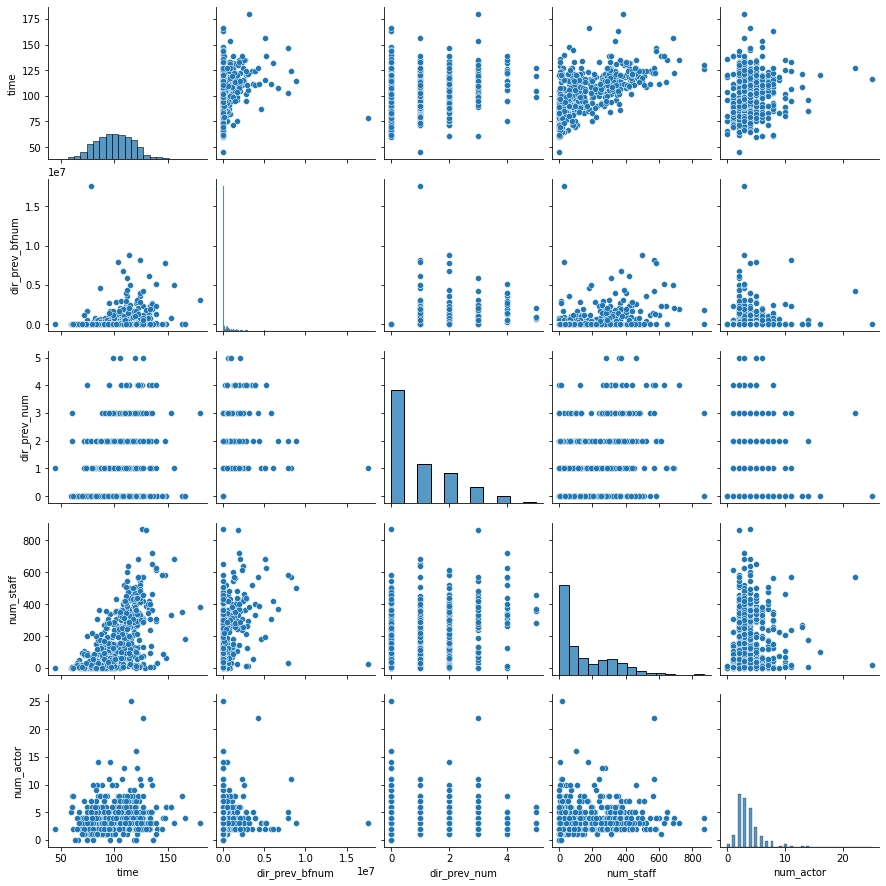

In [50]:
plt.figure(figsize = (10,10))
sns.pairplot(x_train[num_cols])
plt.show()

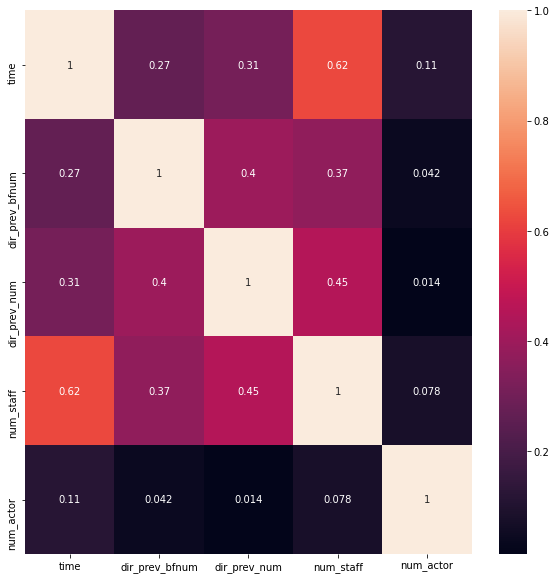

In [51]:
plt.figure(figsize = (10,10))
sns.heatmap(x_train[num_cols].corr(), annot = True)
plt.show()

In [52]:
x_train

,dir_prev_bfnum,dir_prev_num,num_actor,num_staff,time,SF,공포,느와르,다큐멘터리,드라마,...,뮤지컬,미스터리,서스펜스,애니메이션,액션,코미디,12세 관람가,15세 관람가,전체 관람가,청소년 관람불가
0,0.00,0,2,91,96,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1161602.50,2,3,387,130,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,220775.25,4,4,343,123,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,23894.00,2,6,20,101,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,1.00,1,2,251,108,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,3833.00,1,7,510,111,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
596,496061.00,1,6,286,127,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
597,0.00,0,4,123,99,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
598,0.00,0,4,431,102,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [60]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression

In [63]:
rf = RandomForestRegressor().fit(x_train,y_train).predict(x_test)

In [58]:
gbst = GradientBoostingRegressor().fit(x_train,y_train).score(x_train,y_train)
gbst

0.8719148744411167

In [59]:
abst = AdaBoostRegressor().fit(x_train,y_train).score(x_train,y_train)
abst

0.5071212064365613

In [61]:
lr = LinearRegression().fit(x_train,y_train).score(x_train,y_train)
lr

0.35192006604557335

In [62]:
rf 

TypeError: fit() missing 1 required positional argument: 'y'

In [67]:
sub['box_off_num'] = rf

In [69]:
y_pred = sub['box_off_num']

In [70]:
RandomForestRegressor().fit(x_test,y_pred).score(x_test,y_pred)

0.9784717766296027

In [71]:
sub.to_csv('result.csv', index = False)